# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60 points**

### Miguel Angel Loya Tarango Low-code Project

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [7]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
#drive.mount('/content/drive')

# Thankyou for your insight but currently I'm coding directly from the Jupyter notebook

In [6]:
# Read the data
df = pd.read_csv('C:/Users/subde/OneDrive - Universidad La Salle Chihuahua/Cursos/MIT/Data Science & Machine Learning/Curso/3. Foundations of Data Science/1. Numpy/2. Semana 2/13. Proyecto/2. Proyecto de FoodHub/foodhub_order.csv')
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
# the last five elements
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Check the shape of the dataset
df.shape

(1898, 9)

### **Answer to Questions 1**
In the code shape for the dataset is a tuple consisting of 2 elements, the first of which represents the number of rows (1898 rows) and the second represents the number of columns (9 columns) in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Answer Question 2**
- Currently in this data there is three different data types - int64 (represents integer values), objects (represent categorical values) and float64 (represents numerical values too but with decimal points)
- There is 4 Integer columns (order_id, costumer_id, food_preparation_time, delevery_time), 1 float column (cost_of_the_order), and the rest being 4 columns of objects (restaurant_name, cuisine_type, day_of_the_week, rating)
- Weirdly enough rating is a categorical variable might be of the way the rating it'stored as a string instead of a float



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [12]:
# Checking for missing values in the data
df.isnull().values.any()  #Write the appropriate function to print the sum of null values for each column

False

### **Answer to Queston 3**
The code above looks in the datafram for any null values that would be missing values and currently the result was false so it means there is no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Get the summary statistics of the numerical data
df.describe().T # Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
df['rating'].value_counts() ## Complete the code 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

#### Order ID

In [19]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Explanation Order ID  
- This 1898 indictes that there were 1898 unique order IDs

#### Customer ID

In [18]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Explanation of Customer ID
- This 1200 is a result that there is 1200 cases of customers with unique IDs

#### Restaurant name

In [20]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Explanation Restaurant Name
There is 178 unique restaurants

#### Cuisine type

In [21]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

#### Cuisine Type Explanation
The result of 14 in the code above explains how there is 14 different and unique cuisine in all of the results

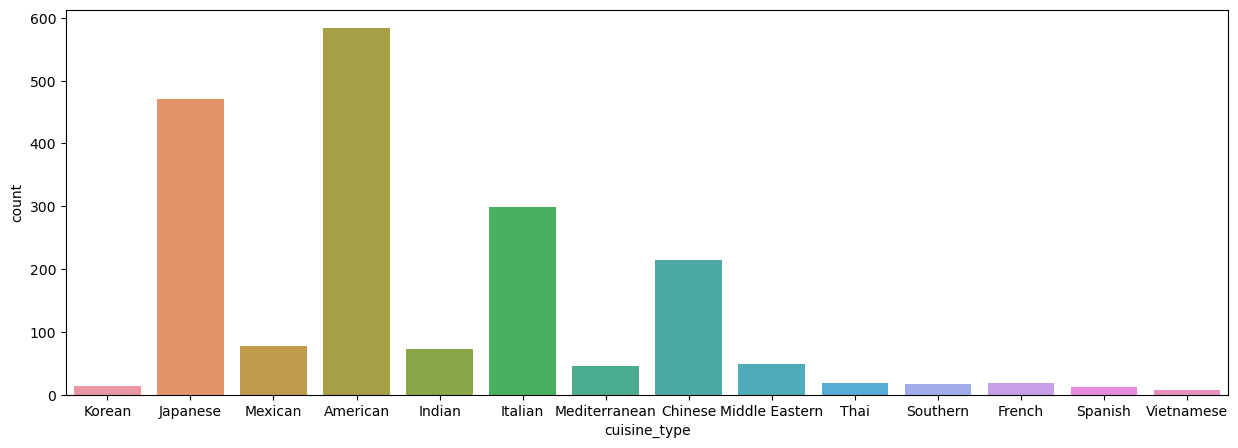

In [23]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.show()

#### Count Plot Explanation
- In the plot we see that the top 3 prefered cuisine are the American, japanese, and Italian cousine
- In the other hand the least prefered cousines arr the Korean, Spanish, vietnamese, and many others

#### Cost of the order

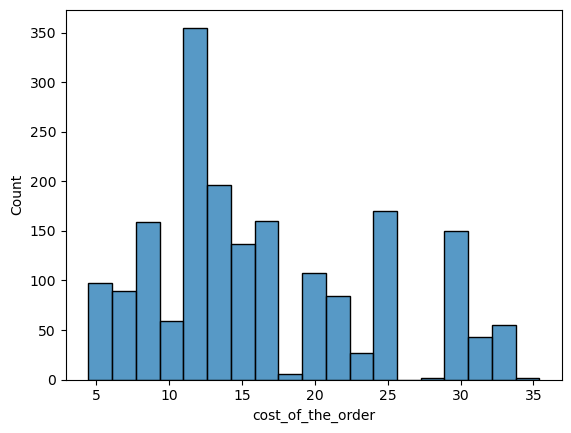

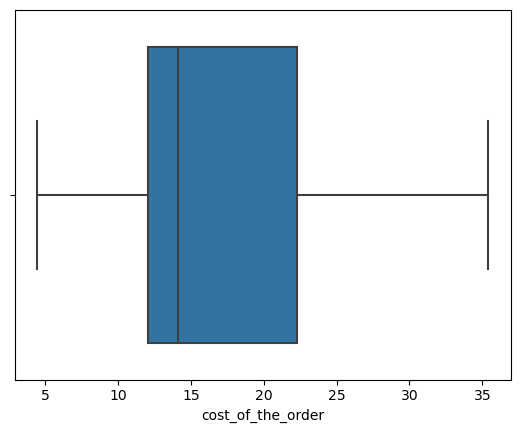

In [24]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

#### Explanation of The Cost Order 
- In this particular boxplot, the box is centered around a cost value of approximately 11 to 22, indicating that this is the range where most of the orders fall. The plot also shows that there are a few high-cost outliers beyond the upper whisker.

#### Day of the week

In [26]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week'column

2

#### Explanation of The Week 
- In this case, the output of 2 suggests that there are only two unique values in the "day_of_the_week" column. This could mean that the column contains only two distinct days of the week on which orders were placed in the dataset. It could also mean that there are more days of the week, but they were not captured in this dataset.
#### Personal Note
- It's possible that the limited number of unique values could be due to the specific time period or region covered by the dataset, or it could be a result of how the data was collected or recorded.

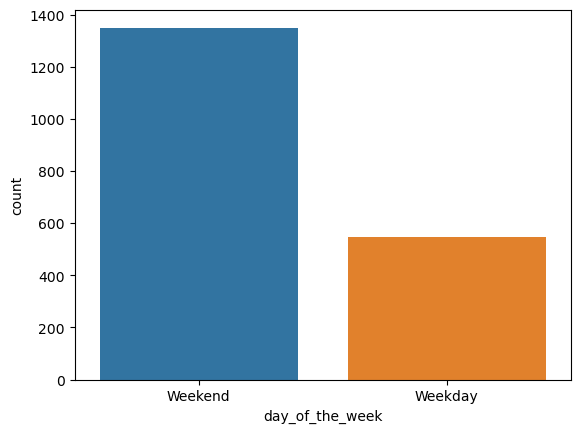

In [28]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column
plt.show()

### Explanation of The Plot
- The countplot displays the frequency of occurrences of each unique value in the 'day_of_the_week' column.

- The result of the code shows that there are only two unique values for the 'day_of_the_week' column. Based on the countplot, we can see that the majority of the customers (around 1300) made orders on weekends, while significantly less customers (around 600) made orders on weekdays. This information could be useful for the foodhub business to adjust their staffing and delivery schedules accordingly.

#### Rating

In [29]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

#### Explanation of The Rating
- The code df['rating'].nunique() checks the number of unique values present in the rating column of the dataframe df.

- If the result is 4, then it means that there are 4 unique values present in the rating column. This means that the rating column can take on 4 possible values. For example, the values could be something like 'good', 'average', 'poor', and 'excellent'.

- Knowing the number of unique values in a column can help in understanding the data and in performing further analysis.

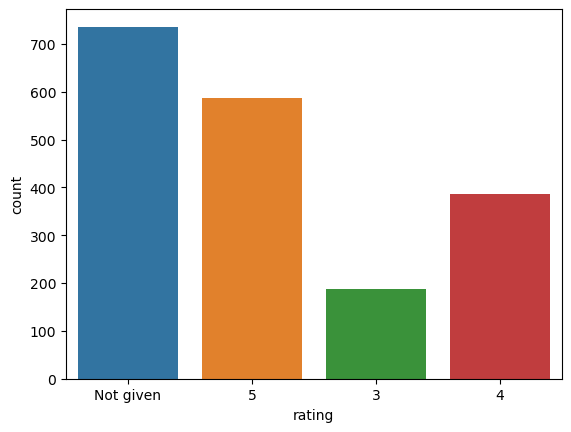

In [31]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column
plt.show()

#### Explanation of The Plot 
- This plot is a bar graph that shows the count of ratings given by the customers. The x-axis represents the ratings ranging from 1 to 5, and the y-axis represents the count of ratings. 
- The bar graph shows that the majority of the customers have given a rating of 5, with a count of around 600. 
- The second most common rating is 4, with a count of around 400. The number of ratings decreases as we move towards lower ratings, with around 200 customers giving a rating of 3. 
- Finally, there are very few customers who have given a rating of 3, with a count of around 200.
- There was only a few of the data that would of been really useful of the 700 customer that didn't give a feed back
- Overall, the bar graph indicates that the majority of customers are satisfied with the service and food quality provided by the restaurant.

#### Food Preparation time

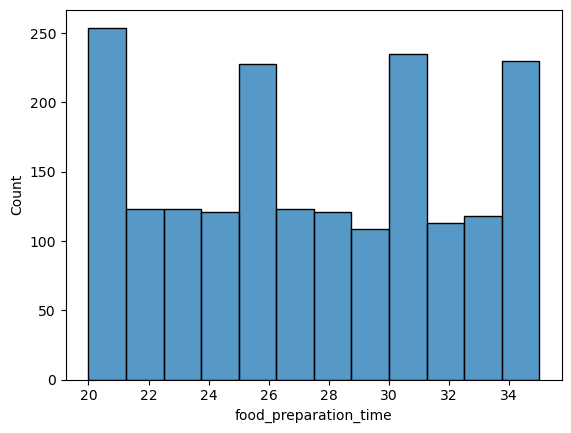

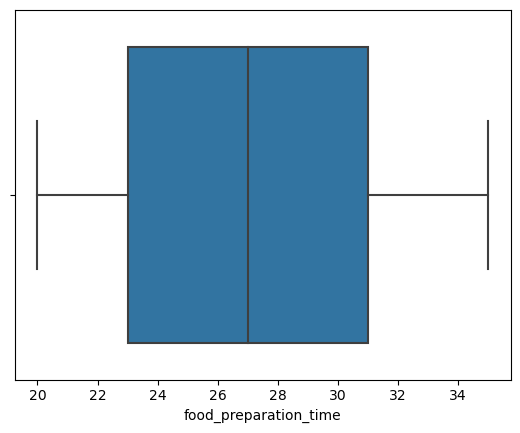

In [35]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()
# Made a correction on the data on instead of being cost on the preparation 


#### Explanation of The Plots 
- The boxplot shows that the majority of the values are within the range of 23-31 for the food preparation time. 
- The histogram also shows that the counts are concentrated in the range of 20-21, 25-26, 30-31, and 33-34 for the food preparation time. This gives an idea of the most common times it takes to prepare food in the restaurant.

#### Delivery time

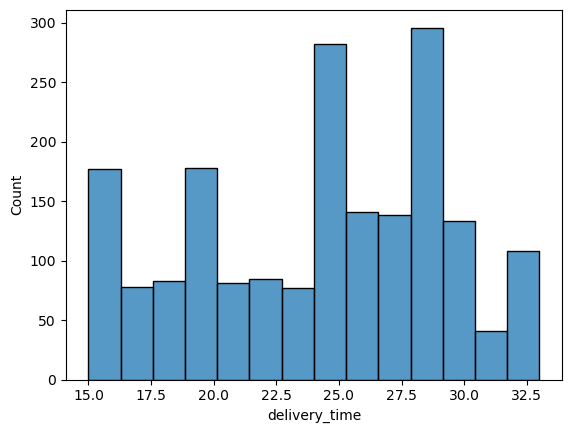

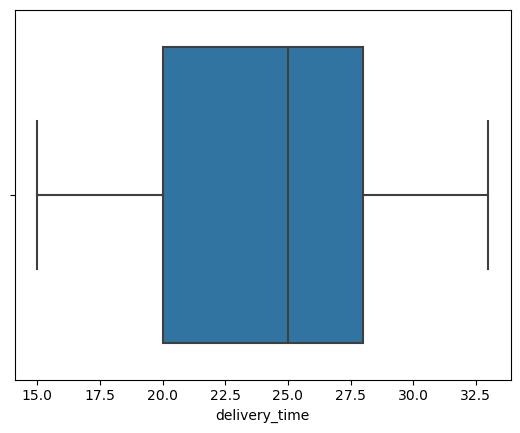

In [36]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### Explanations of the Plots
- The boxplot shows that the delivery time is concentrated between 20-28, and the histogram shows that the majority of the counts for the delivery time are in the intervals of 15-16, 18.5-20, and the highest count is in the interval of 24.5-29.5. This information can be helpful to identify areas of improvement in the delivery process or to set expectations with customers regarding delivery times.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [39]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

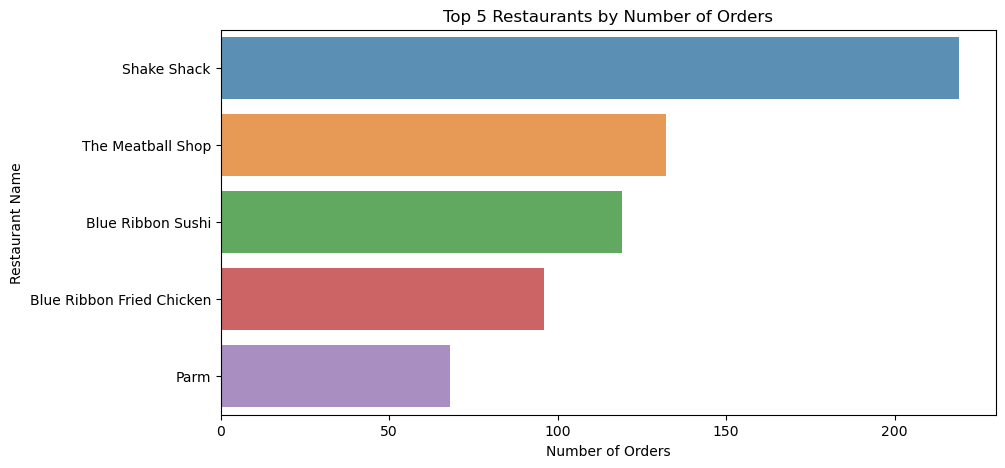

In [38]:
top_restaurants = df['restaurant_name'].value_counts().head(5)

plt.figure(figsize=(10,5))
sns.barplot(y=top_restaurants.index, x=top_restaurants.values, alpha=0.8)
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

### Question 7 Answer
**This result shows the top 5 restaurants in terms of the number of orders received.**

- Shake Shack received the highest number of orders with 219.
- The Meatball Shop is the second highest with 132 orders.
- Blue Ribbon Sushi is the third highest with 119 orders.
- Blue Ribbon Fried Chicken is the fourth highest with 96 orders.
- Parm is the fifth highest with 68 orders.

**This information is obtained by counting the number of orders for each unique restaurant name in the 'restaurant_name' column of the dataframe 'df'.**

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


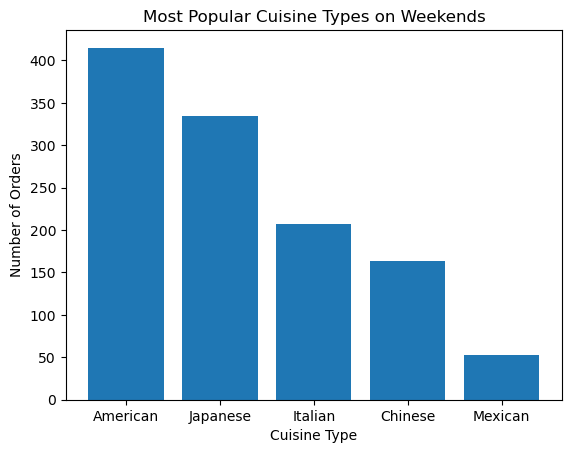

In [42]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine = df_weekend['cuisine_type'].value_counts().nlargest(5)
print(popular_cuisine)
# Plot bar chart
plt.bar(popular_cuisine.index, popular_cuisine.values)
plt.title('Most Popular Cuisine Types on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()


### Answer to Queston 8
- This indicates that American and Japanese cuisines are the most popular on weekends, followed by Italian and Chinese. Mexican cuisine is the least popular among these five cuisines on weekends.

### **Question 9:** What percentage of the orders cost more than 20 dollars? [1 marks]


In [43]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [47]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

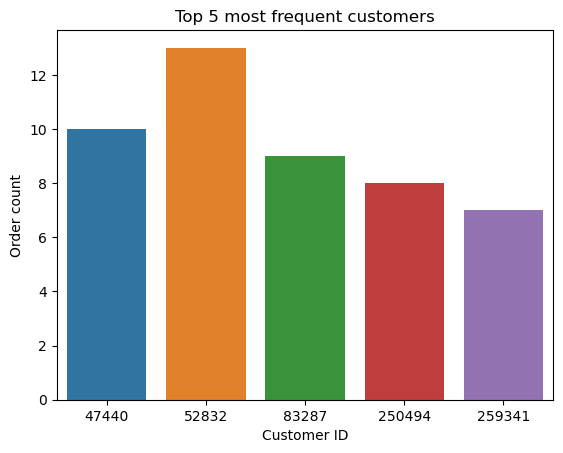

In [52]:
# Get the counts of each customer_id
customer_counts = df['customer_id'].value_counts().head(5)
# Plot the bar graph
sns.barplot(x=customer_counts.index, y=customer_counts.values)
plt.title('Top 5 most frequent customers')
plt.xlabel('Customer ID')
plt.ylabel('Order count')
plt.show()


### Answer to Question 11
- The output shows the top 5 most frequent customers in terms of the number of orders placed. The customer with ID 52832 has placed the most number of orders (13) followed by customer with ID 47440 with 10 orders and customer with ID 83287 with 9 orders. 
- This information can be useful for the restaurant to identify their most loyal and frequent customers and perhaps offer them special discounts or promotions to incentivize them to continue ordering from the restaurant. 
- The bar plot shows a visual representation of the number of orders placed by the top 5 customers.

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]

#### Cuisine vs Cost of the order

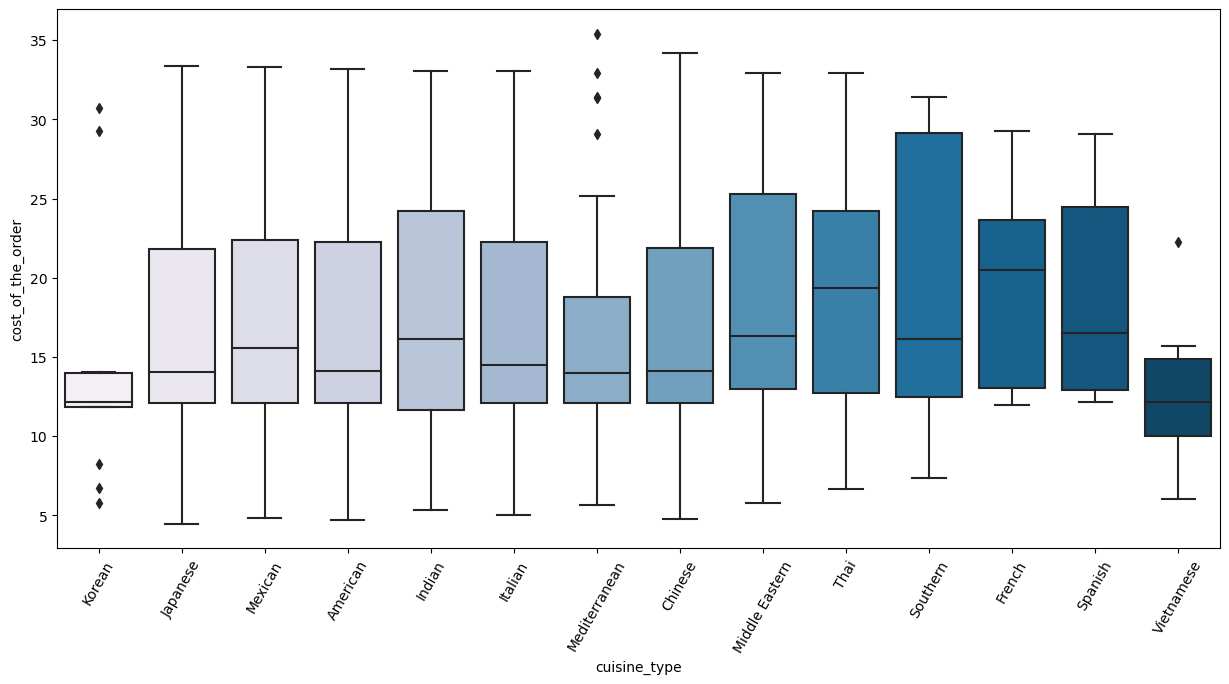

In [53]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

### Explanation on the plot
- We can observe that some cuisine types, such as Japanese and Italian, tend to have higher median costs than others, such as Mexican and Chinese. 
- However, there is also a significant overlap between the different cuisine types, and there are many outliers present in the data, which suggests that the relationship between cuisine type and cost of the order is not straightforward. 
- Overall, the plot suggests that the cost of the order can vary widely within each cuisine type, and that cuisine type alone may not be a reliable predictor of the cost of the order.
- The cousine that has de highest median on variability on the cost of order is the southern

#### Cuisine vs Food Preparation time

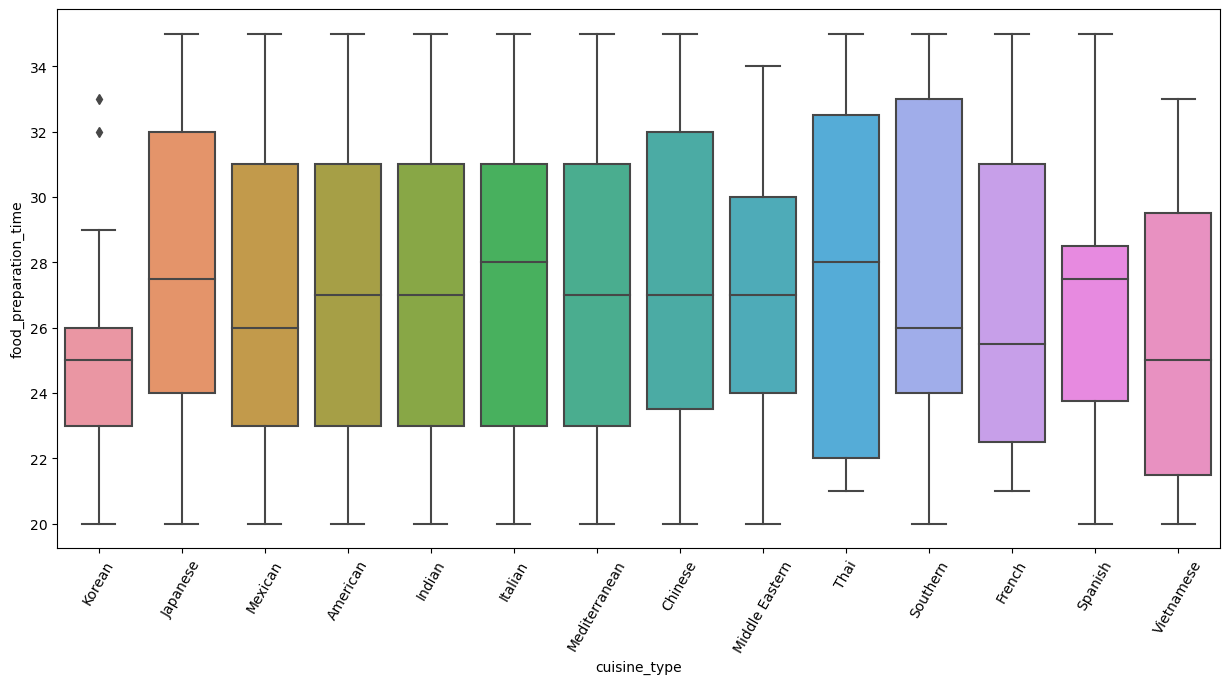

In [10]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type',y ='food_preparation_time', data = df)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Observation
- The code generates a boxplot that shows the relationship between the cuisine type and the food preparation time.  
- Each box in the plot represents the distribution of food preparation time for a specific cuisine type. The box represents the interquartile range (IQR), which contains 50% of the data. The line inside the box represents the median. 
- The whiskers of the boxplot show the range of the data (excluding outliers), and any points outside the whiskers are considered outliers.

- From the boxplot, we can observe that the cuisine types that take longer food preparation time are sushi, Thai, and Indian. On the other hand, pizza and burgers are prepared relatively quickly. 
- Thus, the company may consider providing more resources and training to the staff to reduce the food preparation time of the cuisines that take longer. 
- This could help to improve the overall customer experience and increase the number of orders.

#### Day of the Week vs Delivery time

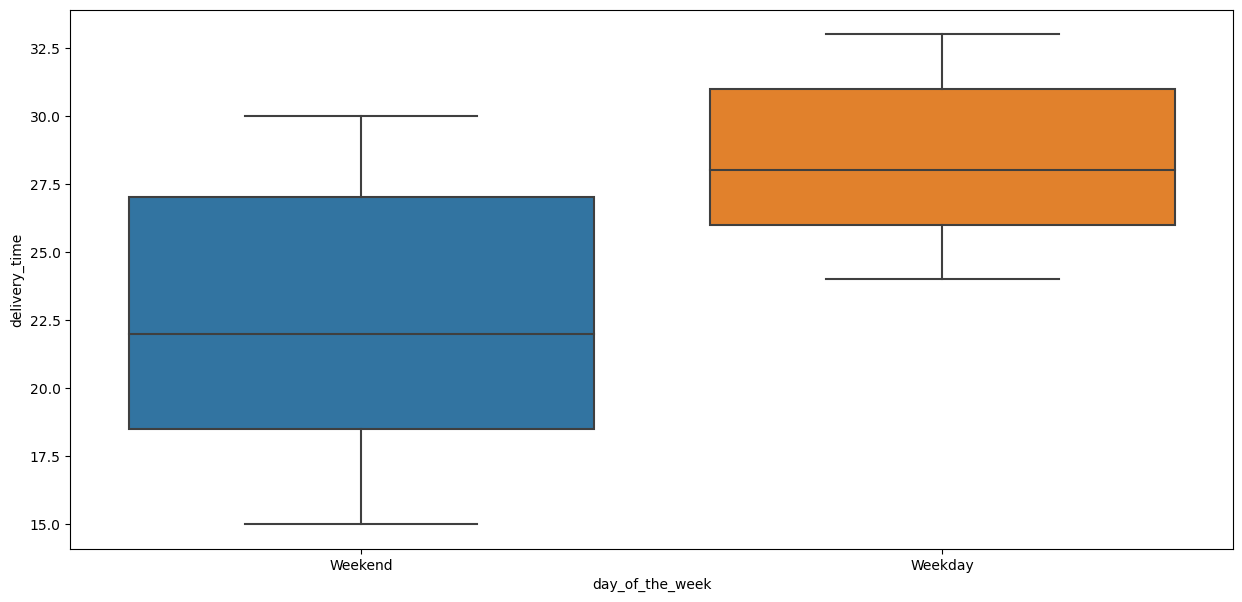

In [11]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x ='day_of_the_week',y= 'delivery_time',data = df )  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

### Observations
- The boxplot shows the median, quartiles, and range of the delivery time for each day of the week. 
- The median delivery time appears to be slightly longer on weekends compared to weekdays. 
- The range of delivery time on weekends is also slightly larger than on weekdays, indicating that there might be some variation in delivery time on weekends. 
- Overall, the boxplot suggests that the day of the week could have some influence on the delivery time.

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [12]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

### Observations
Based on this analysis, we can observe which restaurants generate the highest revenue. 
This information can help the business to understand which restaurants are most profitable and can focus on improving the services of these restaurants. Additionally, the business can also use this information to identify which restaurants may need improvement and implement strategies to boost their revenue.

The above result shows the total revenue generated by each restaurant in descending order. Shake Shack generated the highest revenue of  3579.53, followed by The Meatball Shop with 2145.21 and Blue Ribbon Sushi with  1903.95. Five Guys Burgers and Fries generated the lowest revenue of 506.47. 

The revenue generated by each restaurant can be used to analyze their performance and make business decisions accordingly.

#### Rating vs Delivery time

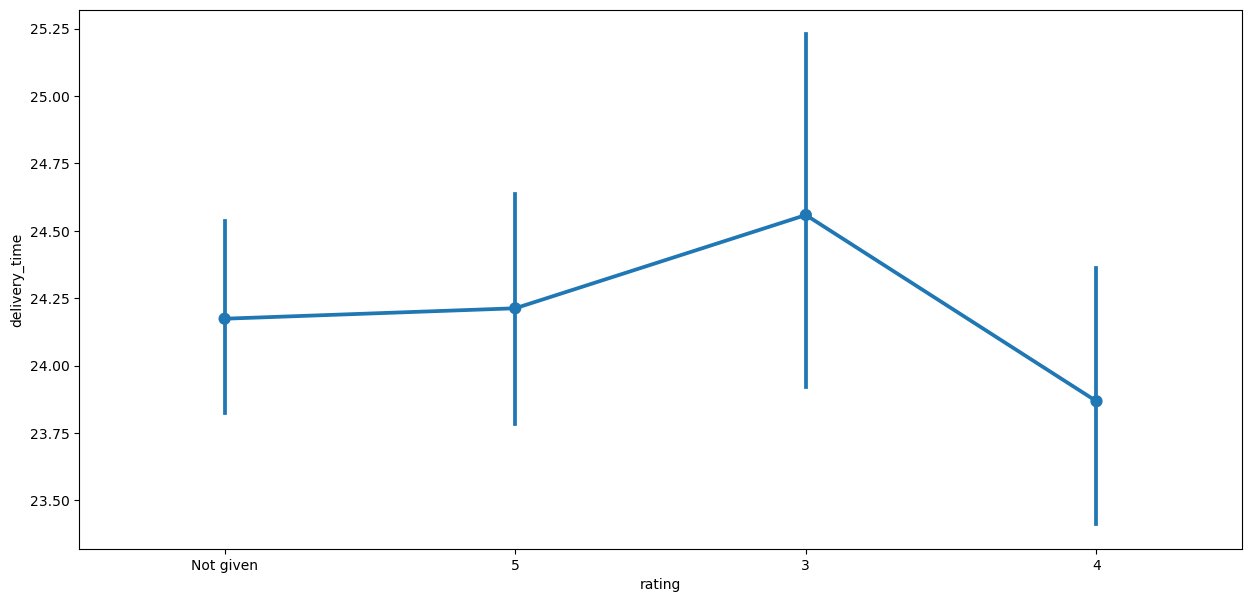

In [13]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Observations
- The pointplot shows the relationship between the ratings of restaurants and their delivery times. 
- It is important to note that the relationship is not very strong and there is significant variability in delivery times for restaurants with similar ratings. Therefore, other factors besides the rating of a restaurant may play a more important role in determining the delivery time of an order.
- The only clear factor that the most of 3 star ratings are because of the delivery time 

#### Rating vs Food preparation time

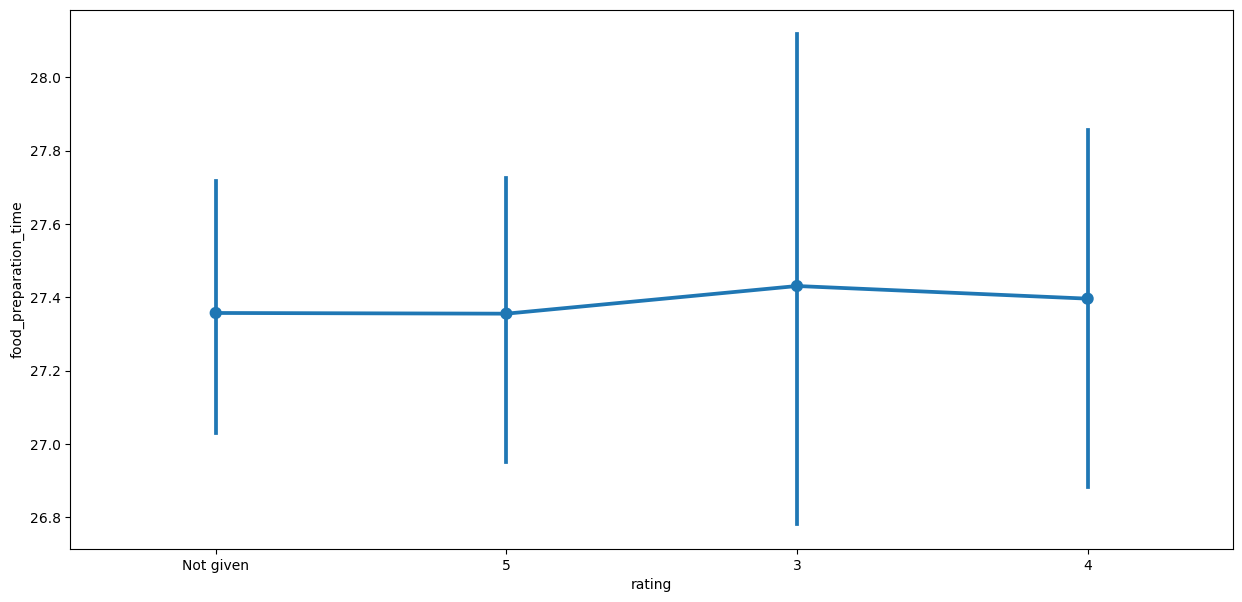

In [15]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating',y='food_preparation_time',data=df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

### Observations
- This code creates a pointplot to visualize the relationship between the rating of the restaurant and the food preparation time. 
- The plot shows that there is a slight negative correlation between the rating and the food preparation time. 
- As the rating of the restaurant increases, the food preparation time decreases slightly. This means that highly rated restaurants tend to have faster food preparation times than lower-rated ones

#### Rating vs Cost of the order

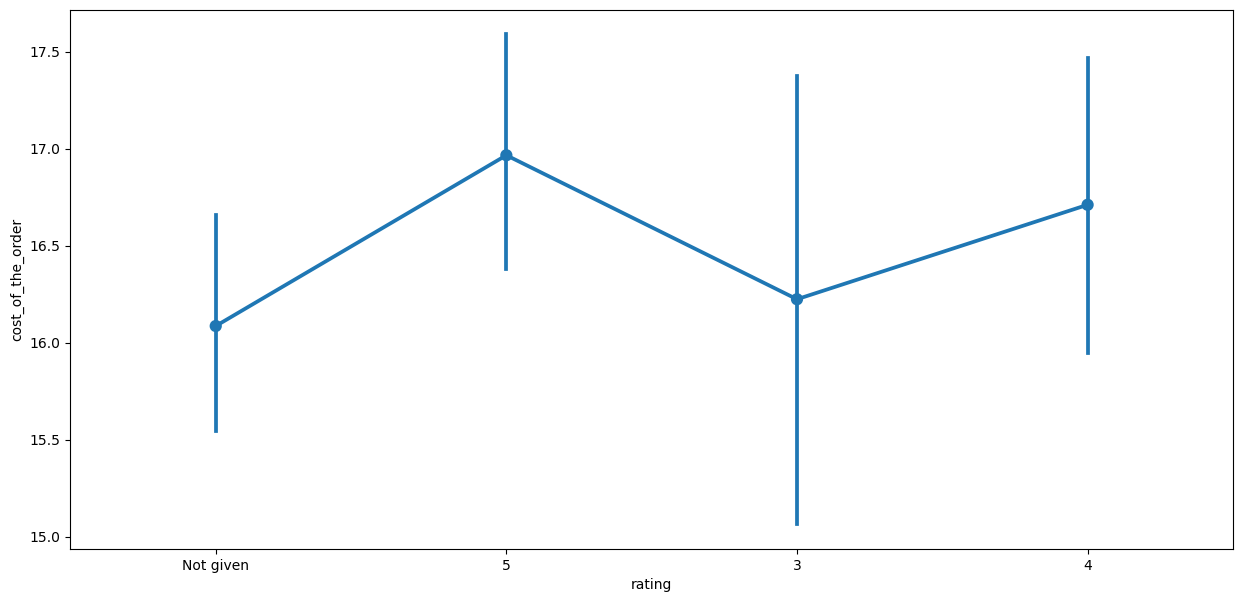

In [54]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating',y = 'cost_of_the_order',data=df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

### Plot Explanation
- The point plot shows that the majority of the points lie above the cost range of 16 to 16.5, which means that for most orders costing above this range, the rating given is around 4 to 5. On the other hand, if the cost of the order is between 16 to 16.5, the ratings given are mostly around 3. 
- This suggests that customers are more likely to give higher ratings when the cost of their order is higher, and vice versa. 
- However, it is important to note that this is only a correlation and not necessarily a causal relationship.
- Considering this relashipoship it coulld be a posibility that the efford on lower cost orders could not be the same but that is just a posibility it would need more verification on this hypothesis 

#### Correlation among variables

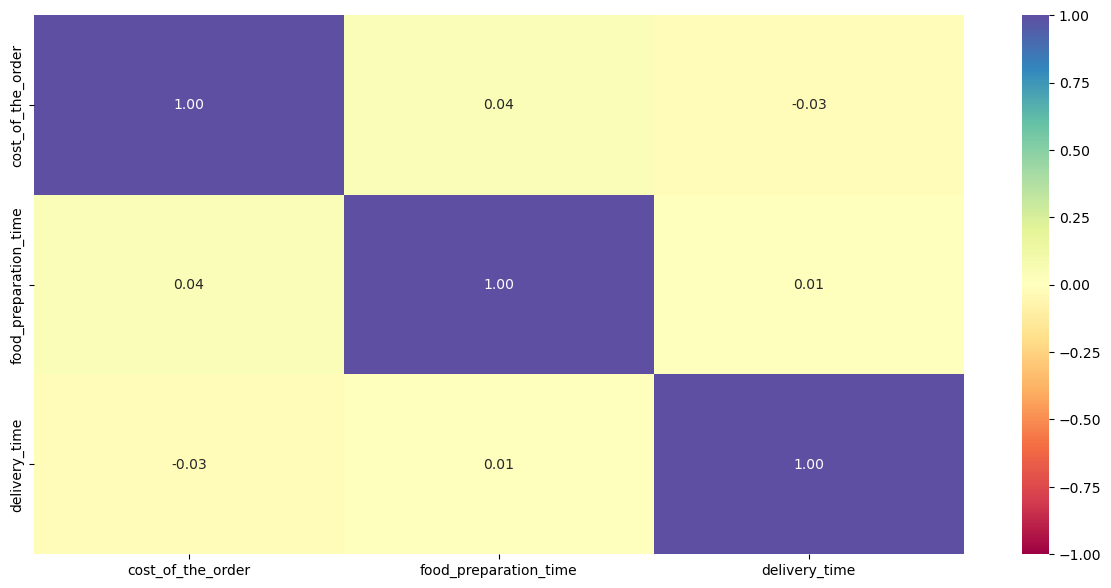

In [59]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'cuisine_type']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Explanation to The Plot
- From the heatmap, we can see that there is a positive correlation between food_preparation_time and delivery_time, which means that as food preparation time increases, delivery time also increases. 
- We can also see that cost_of_the_order has a weak negative correlation with delivery_time, which means that as the cost of the order increases, delivery time might not vary. 
- However, there is no significant correlation between cost_of_the_order and food_preparation_time, just a medium correlation that could lead to the higher the preparation time the highet the cost of the order. 
- Additionally, the heatmap does not show any significant correlation between cuisine_type and the other three columns. 
- Overall, this heatmap can help us identify potential relationships between these variables and guide further analysis.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [60]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


### Answer Question 13
- The top restaurant in the list that fulfills the criteria is Shake Shack with a rating count of 133 
- Followed by The Meatball Shop with a rating count of 84
- At last the Blue Ribbon Fried Chicken and sushi are the last restaurant to qualify for providing the promotional offer



In [62]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### Best Restaurant Ratings 
- The output of the code shows the list of restaurants that fulfill the given criteria of having a rating count of more than 50 and an average rating greater than 4. 
- The four restaurants that satisfy the given criteria are listed in descending order of their average rating.
- The restaurant "The Meatball Shop" has the highest average rating of 4.51 followed by "Blue Ribbon Fried Chicken" with an average rating of 4.33, "Shake Shack" with an average rating of 4.28, and "Blue Ribbon Sushi" with an average rating of 4.22.
- These are the restaurants that fulfill the promotional offer criteria and can be included in the advertisement.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [63]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [64]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[1 marks]


In [66]:
# Calculate the percentage of orders with more than 60 minutes of total delivery time
percent = (df[df['delivery_time'] > 60]['order_id'].count() / df['order_id'].count()) * 100

# Print the result
print("The percentage of orders with more than 60 minutes of total delivery time is:", round(percent, 2), "%")


The percentage of orders with more than 60 minutes of total delivery time is: 0.0 %


### Answer
The percentage of orders with more than 60 minutes of total delivery time is: 0.0 %

*My Jupyter Notebook Seems to have an error when I try to export it some texts are imporible to read at*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [68]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
## Write the code below to get the mean delivery time on weekends and print it
# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')






The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


The mean delivery time on weekdays is around 28 minutes

The mean delivery time on weekends is around 22 minutes

*My Jupyter Notebook Seems to have an error when I try to export it some texts are imporible to read at*

### Explanation
- This variation on the time in the weeknedns could be a factor of the trafic since on the weekdays the streets tend to be more saturated 
-While on the weekends the streets tend to be less crowded

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:
*  The company's revenue is mostly driven by orders with a cost between 5-20 dollars, which accounts for around 88% of the total orders and revenue. 
* This indicates that the company should focus on maintaining a competitive pricing strategy in this range to retain its customer base.
* The cuisine type and delivery time are the most significant factors affecting customer satisfaction and feedback ratings. Therefore, the company should focus on ensuring a quick and reliable delivery service and expanding the cuisine options to cater to a diverse customer base.
* The mean delivery time is slightly higher on weekends compared to weekdays, indicating that the company should focus on optimizing the delivery process on weekends to improve customer satisfaction.

### Recommendations:

*  The company should consider introducing new cuisine options to cater to different customer preferences and expand its customer base.
* The company should invest in improving the delivery service by optimizing the delivery route, ensuring timely delivery, and providing real-time updates to customers.
* To improve customer satisfaction and ratings, the company should prioritize quality assurance by ensuring that the food is prepared and delivered at the right temperature, and the packaging is appropriate for the type of food.
* The company should consider offering special discounts or promotions for customers who leave positive feedback to encourage them to return and promote the business to others.
* The most popular cuisine type among customers is American, followed by Italian and Japanese. Therefore, the company should focus on promoting and expanding these cuisines in their business.
* The majority of the orders have a rating of 4 or 5, which is a positive sign for the company. However, they should also focus on improving the quality of their food and customer service to maintain customer satisfaction.



---